#### Rassi $\it{et\ al}$., Machine learning of linear differential equations using Gaussian process,
#### Journal of Computational Physics __348__ (2017) 683-693

In [1]:
import pymc3 as pm
import theano
import theano.tensor as tt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

### 3.3 Heat equation

The heat equation

$\begin{align}
\mathcal{L}^\alpha_{(t,x)} := \frac{\partial}{\partial t}u(t,x)-\alpha\frac{\partial^2}{\partial x^2}u(t,x) = f(t,x)
\end{align}$

for $\alpha = 1$, the function $f(t,x) = e^{-t}(4\pi^2-1)\sin{(2\pi x)}$ and $u(t,x) = e^{-t}\sin{(2\pi x)}$ satisfy this function.


In [2]:
# true function
def u_tx(t,x):
    return np.exp(-1.*t)*np.sin(2.*np.pi*x)

def f_tx(t,x):
    return np.exp(-1.*t)*(4.*np.pi*np.pi-1.)*np.sin(2.*np.pi*x)

In [3]:
# training data
N = 20
np.random.seed(313)
t_x_u_train = np.random.rand(N,2)
t_x_f_train = np.random.rand(N,2)

u_train = u_tx(t_x_u_train[:,0],t_x_u_train[:,1])
f_train = f_tx(t_x_f_train[:,0],t_x_f_train[:,1])

# mesh
t = np.linspace(0.,1.,num=50)
x = np.linspace(0.,1.,num=50)
t_mesh, x_mesh = np.meshgrid(t,x)
u_tx_mesh = u_tx(t_mesh,x_mesh)
f_tx_mesh = f_tx(t_mesh,x_mesh)

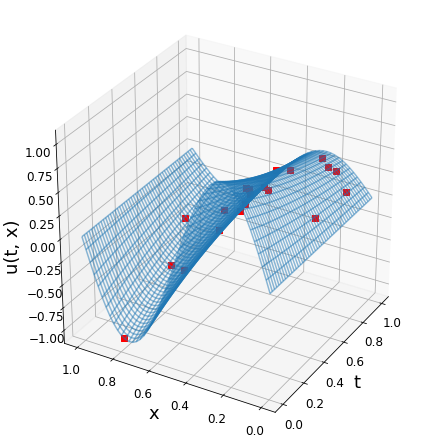

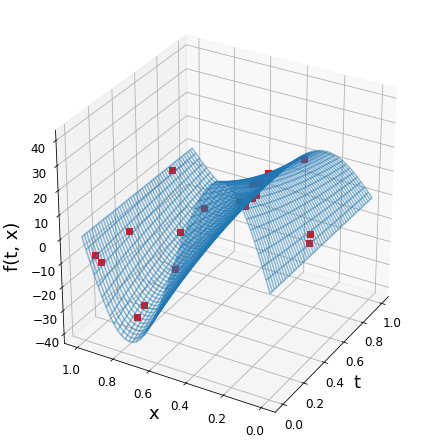

In [4]:
# training data and true function u(t,x)
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

ax.plot_wireframe(t_mesh, x_mesh, u_tx_mesh, alpha=0.5)
ax.scatter(t_x_u_train[:,0], t_x_u_train[:,1], u_train, color="red", marker="s", s=40, depthshade=False)

ax.set_xlabel("t",fontsize=18)
ax.set_ylabel("x",fontsize=18)
ax.set_zlabel("u(t, x)",fontsize=18,labelpad=10.,rotation=90.)
ax.zaxis.set_rotate_label(False)
ax.tick_params(labelsize=12)
ax.view_init(elev=30., azim=210.)

plt.show()

# f(t,x)
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

ax.plot_wireframe(t_mesh, x_mesh, f_tx_mesh, alpha=0.5)
ax.scatter(t_x_f_train[:,0], t_x_f_train[:,1], f_train, color="red", marker="s", s=40, depthshade=False)

ax.set_xlabel("t",fontsize=18)
ax.set_ylabel("x",fontsize=18)
ax.set_zlabel("f(t, x)",fontsize=18,labelpad=10.,rotation=90.)
ax.zaxis.set_rotate_label(False)
ax.tick_params(labelsize=12)
ax.view_init(elev=30., azim=210.)

plt.show()

In [5]:
"""couldn't be completed"""
# # infer thermal diffusivity coefficient alpha
# with pm.Model() as model:
#     log_alpha = pm.Uniform("log_alpha",lower=-10.,upper=5.)
#     alpha = pm.Deterministic("alpha",tt.exp(log_alpha))
# #     alpha = 1.
    
#     log_sigma_u = pm.Uniform("log_sigma_u",lower=-10.,upper=5.)
#     sigma_u = pm.Deterministic("sigma_u",tt.exp(log_sigma_u))
#     log_ell_t = pm.Uniform("log_ell_t",lower=-10.,upper=3.)
#     ell_t = pm.Deterministic("ell_t",tt.exp(log_ell_t))
#     log_ell_x = pm.Uniform("log_ell_x",lower=-10.,upper=3.)
#     ell_x = pm.Deterministic("ell_x",tt.exp(log_ell_x))
#     log_sigma_n_u = pm.Uniform("log_sigma_n_u",lower=-10.,upper=3.)
#     sigma_n_u = pm.Deterministic("sigma_n_u",tt.exp(log_sigma_n_u))
#     log_sigma_n_f = pm.Uniform("log_sigma_n_f",lower=-10.,upper=3.)
#     sigma_n_f = pm.Deterministic("sigma_n_f",tt.exp(log_sigma_n_f))
    
# #     # Tried Theano automatic differentiation but not work...
# #     theano.config.compute_test_value = 'ignore'    
# #     X1 = tt.dscalar('X1')
# #     X2 = tt.dscalar('X2')

# #     k_uu = sigma_u**2*np.exp((-0.5)*np.subtract.outer(X1,X2)**2/(ell_t*ell_t))
# #     k_uf = tt.grad(cost=k_uu, wrt=X2)
# # #     k_fu = tt.grad(cost=k_uu, wrt=X1)
# # #     k_ff = tt.grad(cost=k_fu, wrt=X2)
    
# #     K_uu = theano.function(inputs=[X1,X2],outputs=k_uf)


#     k_uu = sigma_u**2*tt.exp((-0.5)*np.subtract.outer(t_x_u_train[:,0],t_x_u_train[:,0])**2/(ell_t**2))\
#                      *tt.exp((-0.5)*np.subtract.outer(t_x_u_train[:,1],t_x_u_train[:,1])**2/(ell_x**2))\
    
#     k_uf = (np.subtract.outer(t_x_u_train[:,0],t_x_f_train[:,0])/(ell_t**2)\
#             -1.*alpha*(np.subtract.outer(t_x_u_train[:,1],t_x_f_train[:,1])**2/(ell_x**4)-1./(ell_x**2)))\
#             *sigma_u**2*tt.exp((-0.5)*np.subtract.outer(t_x_u_train[:,0],t_x_f_train[:,0])**2/(ell_t**2))\
#                      *tt.exp((-0.5)*np.subtract.outer(t_x_u_train[:,1],t_x_f_train[:,1])**2/(ell_x**2))\
    
#     k_fu = (-1.*np.subtract.outer(t_x_f_train[:,0],t_x_u_train[:,0])/(ell_t**2)\
#             -1.*alpha*(np.subtract.outer(t_x_f_train[:,1],t_x_u_train[:,1])**2/(ell_x**4)-1./(ell_x**2)))\
#             *sigma_u**2*tt.exp((-0.5)*np.subtract.outer(t_x_f_train[:,0],t_x_u_train[:,0])**2/(ell_t**2))\
#                      *tt.exp((-0.5)*np.subtract.outer(t_x_f_train[:,1],t_x_u_train[:,1])**2/(ell_x**2))\
    
#     k_ff = ((-1.*np.subtract.outer(t_x_f_train[:,0],t_x_f_train[:,0])**2/(ell_t**4)+1./(ell_t**2))\
#            +alpha**2*(np.subtract.outer(t_x_f_train[:,1],t_x_f_train[:,1])**4/(ell_x**8)\
#                      -6.*np.subtract.outer(t_x_f_train[:,1],t_x_f_train[:,1])**3/(ell_x**6)\
#                      +3./(ell_x**4)))\
#             *sigma_u**2*tt.exp((-0.5)*np.subtract.outer(t_x_f_train[:,0],t_x_f_train[:,0])**2/(ell_t**2))\
#                      *tt.exp((-0.5)*np.subtract.outer(t_x_f_train[:,1],t_x_f_train[:,1])**2/(ell_x**2))\
    
#     noise = tt.concatenate([sigma_n_u*np.ones((N,1)),sigma_n_f*np.ones((N,1))],0).flatten()
    
#     O = tt.zeros((N,N))
    
#     L_uu = tt.concatenate([tt.concatenate([k_uu,O],1),tt.concatenate([O,O],1)],0)+1.e-12*tt.eye(2*N)
#     L_uf = tt.concatenate([tt.concatenate([O,k_uf],1),tt.concatenate([O,O],1)],0)+0.e-12*tt.eye(2*N)
#     L_fu = tt.concatenate([tt.concatenate([O,O],1),tt.concatenate([k_fu,O],1)],0)+0.e-12*tt.eye(2*N)
#     L_ff = tt.concatenate([tt.concatenate([O,O],1),tt.concatenate([O,k_ff],1)],0)+1.e-12*tt.eye(2*N)
    
#     K_uu = L_uu * pm.gp.cov.Constant(1.0)
#     K_uf = L_uf * pm.gp.cov.Constant(1.0)
#     K_fu = L_fu * pm.gp.cov.Constant(1.0)
#     K_ff = L_ff * pm.gp.cov.Constant(1.0)
    
#     gp_uu = pm.gp.Marginal(cov_func=K_uu)
#     gp_uf = pm.gp.Marginal(cov_func=K_uf)
#     gp_fu = pm.gp.Marginal(cov_func=K_fu)
#     gp_ff = pm.gp.Marginal(cov_func=K_ff)

#     gp = gp_uu + gp_uf + gp_fu + gp_ff

#     y_ = gp.marginal_likelihood("y", X=np.vstack([t_x_u_train,t_x_f_train]), y=np.hstack([u_train,f_train]), noise=noise)
    
#     step = pm.NUTS()
#     trace = pm.sample(draws=5000, step=step, progressbar=True)
#     mp = pm.find_MAP()

"couldn't be completed"

covariance matrix

$\begin{align}
\it k &= \sigma^2 \, \mathrm{exp}\left[\mathrm -\frac{1}{2}\left\{\frac{\left(\it t - \it t'\right)^2}{\ell_t^2}\mathrm + \frac{\left(\it x - \it x'\right)^2}{\ell_x^2}\right\}\right]\\
\it K &= \begin{pmatrix}\it k & \mathcal{L}\it k \\ \mathcal{L}\it k & \mathcal{L}\mathcal{L}\it k \end{pmatrix}
\end{align}$

In [6]:
# pm.traceplot(trace);plt.show()

In [7]:
# mp

In [8]:
"""Infer u(t,x) and f(t,x)"""

'Infer u(t,x) and f(t,x)'

In [9]:
# Noisy data
noise_true = 0.1
u_observed = u_train + noise_true*np.random.randn(N)

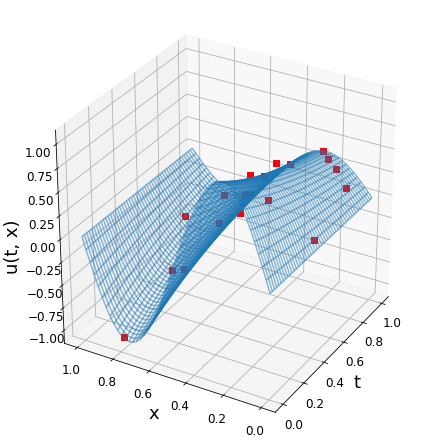

In [10]:
# training data and true function u(t,x)
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

ax.plot_wireframe(t_mesh, x_mesh, u_tx_mesh, alpha=0.5)
ax.scatter(t_x_u_train[:,0], t_x_u_train[:,1], u_observed, color="red", marker="s", s=40, depthshade=False)

ax.set_xlabel("t",fontsize=18)
ax.set_ylabel("x",fontsize=18)
ax.set_zlabel("u(t, x)",fontsize=18,labelpad=10.,rotation=90.)
ax.zaxis.set_rotate_label(False)
ax.tick_params(labelsize=12)
ax.view_init(elev=30., azim=210.)

plt.show()

In [11]:
with pm.Model() as model:
    log_eta = pm.Uniform("log_eta",lower=-10.,upper=5.)
    eta = pm.Deterministic("eta",tt.exp(log_eta))
    log_ell_t = pm.Uniform("log_ell_t",lower=-10.,upper=5.)
    ell_t = pm.Deterministic("ell_t",tt.exp(log_ell_t))
    log_ell_x = pm.Uniform("log_ell_x",lower=-10.,upper=5.)
    ell_x = pm.Deterministic("ell_x",tt.exp(log_ell_x))
    log_noise = pm.Uniform("log_noise",lower=-10.,upper=5.)
    noise = pm.Deterministic("noise",tt.exp(log_noise))
    
    cov = eta**2*pm.gp.cov.ExpQuad(2,ls=ell_t,active_dims=[0])*pm.gp.cov.ExpQuad(2,ls=ell_x,active_dims=[1])
#     cov = eta**2*(pm.gp.cov.ExpQuad(2,ls=ell_t,active_dims=[0])+pm.gp.cov.ExpQuad(2,ls=ell_x,active_dims=[1]))
#     cov = eta**2*pm.gp.cov.ExpQuad(2,ls=ell_t,active_dims=[0])*pm.gp.cov.Cosine(2,ls=ell_x,active_dims=[1])
    
    gp = pm.gp.Marginal(cov_func=cov)
    
    u_ = gp.marginal_likelihood("u", X=t_x_u_train, y=u_observed, noise=noise)
    
    step = pm.NUTS()
    trace = pm.sample(draws=5000, step=step, progressbar=True)
    mp = pm.find_MAP()

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [log_noise, log_ell_x, log_ell_t, log_eta]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:39<00:00, 280.75draws/s]
The acceptance probability does not match the target. It is 0.8812933514275719, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
/Users/seryonaoki/anaconda3/envs/ML/lib/python3.7/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -3.4226, ||grad|| = 0.0040963: 100%|██████████| 24/24 [00:00<00:00, 988.51it/s]  


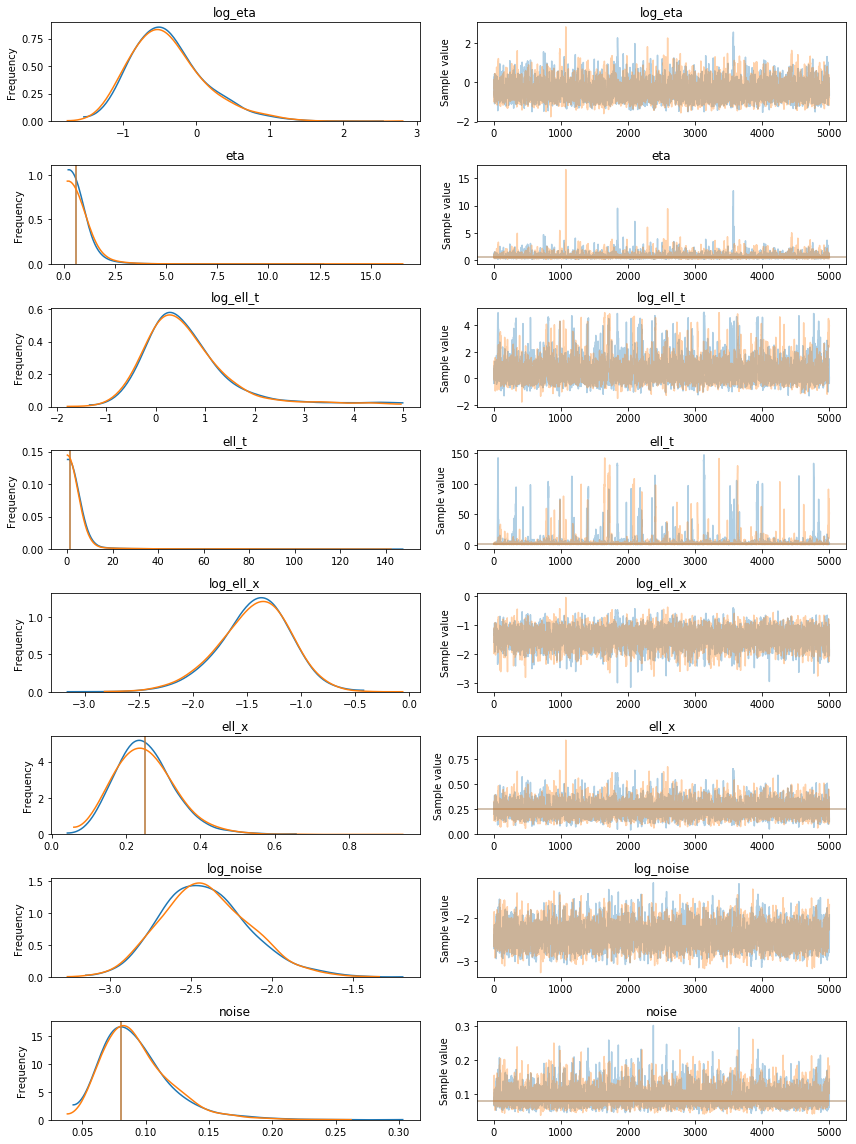

In [12]:
pm.traceplot(trace,lines={"eta":mp["eta"],"ell_t":mp["ell_t"],"ell_x":mp["ell_x"],"noise":mp["noise"]});plt.show()

In [13]:
print(noise_true,mp["noise"])

0.1 0.08036039659755725


In [14]:
Input = np.hstack([t_mesh.flatten(order='C')[:,None],x_mesh.flatten(order='C')[:,None]])

with model:
    mu, var = gp.predict(Input,point=mp)
    sd = np.sqrt(np.diag(var))

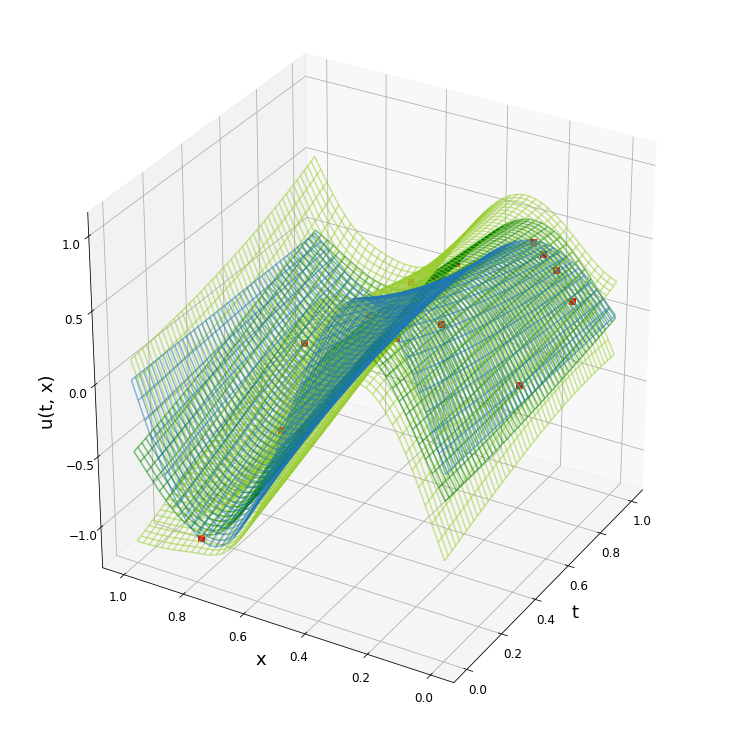

In [15]:
# posterior distribution
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

ax.plot_wireframe(t_mesh, x_mesh, u_tx_mesh, alpha=0.5)
ax.plot_wireframe(t_mesh, x_mesh, mu.reshape((50,50),order="C"), color="green", alpha=0.5)
ax.plot_wireframe(t_mesh, x_mesh, mu.reshape((50,50),order="C")+2.*sd.reshape((50,50),order="C"), color="yellowgreen", alpha=0.5)
ax.plot_wireframe(t_mesh, x_mesh, mu.reshape((50,50),order="C")-2.*sd.reshape((50,50),order="C"), color="yellowgreen", alpha=0.5)
ax.scatter(t_x_u_train[:,0], t_x_u_train[:,1], u_observed, color="red", marker="s", s=40, depthshade=False)

ax.set_xlabel("t",fontsize=18)
ax.set_ylabel("x",fontsize=18)
ax.set_zlabel("u(t, x)",fontsize=18,labelpad=10.,rotation=90.)
ax.zaxis.set_rotate_label(False)
ax.tick_params(labelsize=12)
ax.view_init(elev=30., azim=210.)

plt.show()

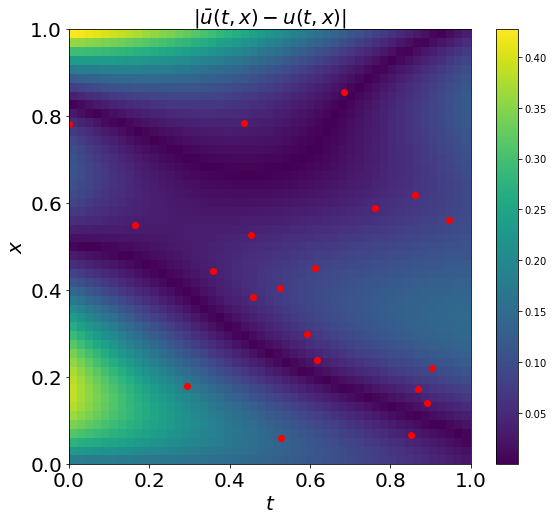

In [16]:
fig, ax = plt.subplots(figsize=(9,8))

plt.pcolormesh(t_mesh,x_mesh,np.abs(mu.reshape((50,50),order="C")-u_tx_mesh),cmap="viridis")
plt.plot(t_x_u_train[:,0],t_x_u_train[:,1],"ro")

plt.colorbar()
plt.xlabel(r"$t$",fontsize=20)
plt.ylabel(r"$x$",fontsize=20)
plt.tick_params(labelsize=20)
plt.title(r"|$\bar{u}(t,x)-u(t,x)$|",fontsize=20)
plt.show()